# A short demo of how to use LOCOPath in Python

## import our package varImp

In [1]:
import varImp

In [2]:
import numpy as np
from sklearn import linear_model

from sklearn import preprocessing
from scipy.interpolate import interp1d
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


## Genereate some data

### Let's do high-dimensional linear regression, with $n = 100$ records and $p = 1000$ features, where the active set is the 1st 10 features.

### As you noticed, the $\beta$ vector is very sparse, with 990  zero importance features and only 10 features significance
### $(1,1,1,1,1, 2,2,2,2, 5, 0, \dots, 0)$

In [23]:
n = 100
p = 1000
s = 10

In [27]:
X = np.random.normal(size = [n, p])
beta = np.array([1] * 5 + [2] * 4 + [5] + [0] * (p - s))
Y = np.dot(X, beta) + np.random.normal(size = n)

## Visualize the solution path -- we would first use LARS

### If we want to measure importance of 10th feature, which is the most important one, so set $j = 9$ (start with 0)

In [51]:
j = 9

In [52]:
alphas, _, coefs  = linear_model.lars_path(X, Y, Gram = None, method = 'lasso', return_path = True)
alphas_j, _, coefs_j  = linear_model.lars_path(np.delete(X, j, axis = 1), Y, Gram=None, method = 'lasso', return_path=True)

### Removing the most importance feature changed the path a lot ...

(-1, 5)

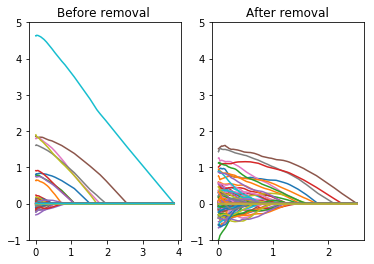

In [53]:
plt.subplot(121)
for i in range(coefs.shape[0]):
    plt.plot(alphas, coefs[i,:])
    plt.title("Before removal ")
plt.ylim(-1, 5)    

plt.subplot(122)    
for i in range(coefs_j.shape[0]):
    plt.plot(alphas_j, coefs_j[i,:], )
    plt.title("After removal")
plt.ylim(-1, 5)    

(-1, 5)

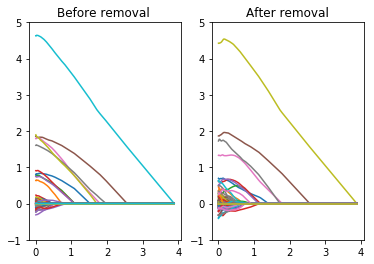

In [54]:
j = 7
alphas, _, coefs  = linear_model.lars_path(X, Y, Gram = None, method = 'lasso', return_path = True)
alphas_j, _, coefs_j  = linear_model.lars_path(np.delete(X, j, axis = 1), Y, Gram=None, method = 'lasso', return_path=True)

plt.subplot(121)
for i in range(coefs.shape[0]):
    plt.plot(alphas, coefs[i,:])
    plt.title("Before removal ")
plt.ylim(-1, 5)    

plt.subplot(122)    
for i in range(coefs_j.shape[0]):
    plt.plot(alphas_j, coefs_j[i,:], )
    plt.title("After removal")
plt.ylim(-1, 5)    

### Removing un unimportant feature barely changed the path ...

In [31]:
j = 20

In [32]:
alphas_j, _, coefs_j  = linear_model.lars_path(np.delete(X, j, axis = 1), Y, Gram=None, method = 'lasso', return_path=True)

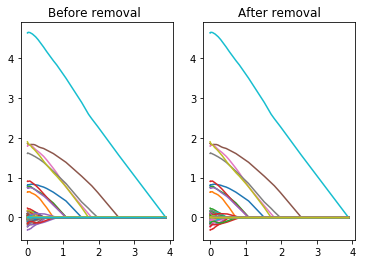

In [33]:
plt.subplot(121)
for i in range(coefs.shape[0]):
    plt.plot(alphas, coefs[i,:])
    plt.title("Before removal ")
    
plt.subplot(122)    
for i in range(coefs_j.shape[0]):
    plt.plot(alphas_j, coefs_j[i,:])
    plt.title("After removal")
    

## Now you get the idea, how should we quantify the "change" ?  -- The PARSE SCORE

$$LOCO\_PARSE\_SCORE_j = \sum || \int |\beta_i(\lambda) - \beta^{(j)}_i(\lambda)|_p d\lambda||_q$$

### Feature importance of 1st 10 features:

In [34]:
for i in range(10):
    print("Now compting {}th TS: {}".format(i, varImp.LOCO_TS(varImp.ExtractPath_LARS(X, Y, i, 0))))

Now compting 0th TS: 0.7482425005268459
Now compting 1th TS: 0.24147043305944418
Now compting 2th TS: 0.45402417424592195
Now compting 3th TS: 0.605070087870412
Now compting 4th TS: 0.44923791933792384
Now compting 5th TS: 5.153048395133105
Now compting 6th TS: 3.729825899350819
Now compting 7th TS: 2.8076274359410363
Now compting 8th TS: 3.072488873121836
Now compting 9th TS: 36.89038178609808


### Feature importance of unimportant features:

In [35]:
for i in range(10, 20):
    print("Now compting {}th TS: {}".format(i, varImp.LOCO_TS(varImp.ExtractPath_LARS(X, Y, i, 0))))

Now compting 10th TS: 0.0
Now compting 11th TS: 0.0
Now compting 12th TS: 0.0
Now compting 13th TS: 0.0
Now compting 14th TS: 0.0
Now compting 15th TS: 0.0
Now compting 16th TS: 0.0
Now compting 17th TS: 0.0
Now compting 18th TS: 0.0
Now compting 19th TS: 0.0


In [36]:
imp_list = [ varImp.LOCO_TS(varImp.ExtractPath_LARS(X, Y, i, 0)) for i in range(0, 30) ]

In [37]:
parse_score = (imp_list - min(imp_list)) / (max(imp_list) - min(imp_list))

In [38]:
parse_score 

array([0.02028286, 0.00654562, 0.01230739, 0.01640184, 0.01217764,
       0.13968542, 0.10110565, 0.0761073 , 0.08328699, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

## Clearly, the first 10 feature could be flagged as important features! 


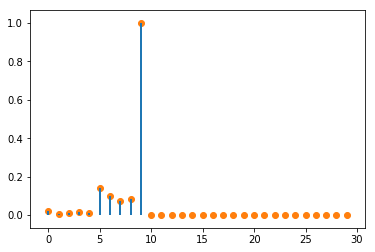

In [39]:
plt.bar(list(range(30)),parse_score, width = 0.2)
plt.scatter(list(range(30)), parse_score)

### Anything interesting in the 1st 100 features, other than the 1st 10?  -- As we expected, no! Only the 1st 10 features!

In [40]:
imp_list = [ varImp.LOCO_TS(varImp.ExtractPath_LARS(X, Y, i, 0)) for i in range(0, 100) ]

(0, 6)

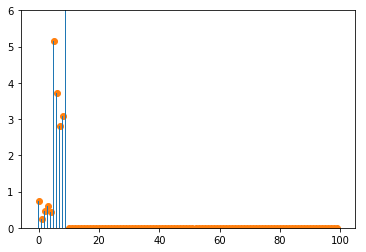

In [48]:
plt.bar(list(range(100)),imp_list, width = 0.4)
plt.scatter(list(range(100)), imp_list)
plt.ylim(0, 6)

In [49]:
imp_list

[0.7482425005268459,
 0.24147043305944418,
 0.45402417424592195,
 0.605070087870412,
 0.44923791933792384,
 5.153048395133105,
 3.729825899350819,
 2.8076274359410363,
 3.072488873121836,
 36.89038178609808,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00031675778662776106,
 6.84922565185826e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.75198836694447e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00012466369144977098,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00021645003375206603,
 0.0,
 0.0,
 0.0,
 0.0]

## To make statistical inference, we can further boostrap the parse_score and obtain p-values! This is implemented in the R LOCOpath package!
